In [2]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [142]:
df=pd.read_csv("https://tinyurl.com/2r24n45l")

In [143]:
df.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [152]:
df["Name"]=df["Name"].str.split(" ").str[0]

In [153]:
df["Year"]=df["Year"].apply(lambda x : x if x<2023 else int(str(x)[:4]))

In [159]:
pvt=df[(df["Year"]>=2018) & (df["Year"]<2023)].pivot_table(index="Name",columns="Year",aggfunc={"Price":"mean","Miles":"median"})
pvt

Miles                                             Price  \
Year              2018     2019     2020     2021     2022          2018   
Name                                                                       
Acura          32516.0  50959.0  30894.0  10922.0      NaN  25323.333333   
Alfa           38908.0  20928.0      NaN      NaN      NaN  28490.000000   
Audi           49762.0  50169.5  30423.5  11205.0  20917.0  30345.555556   
BMW            39269.0  36306.0  23171.0  19978.0   3780.0  31762.093023   
Buick          50702.0  41152.0  36626.0  39884.0    372.0  21516.254545   
Cadillac       57116.0  29609.0  41046.0      NaN      NaN  28390.000000   
Chevrolet      53355.0  46375.0  50743.0  37527.0  13022.0  21262.413043   
Chrysler       64685.5  65963.0  48960.0  44225.0  24427.0  24125.062500   
Dodge          78986.0  65497.0  30995.5  32159.5   9089.0  20807.283951   
FIAT           24731.0  14573.0      NaN      NaN      NaN  22602.500000   
Ford           50572.0  47657.5  49136.0  22391.0   5298.5  20214.190283   
GMC            54181.0  54017.0  54055.0  41904.5   9854.0  26052.206897   
Genesis        42192.0  16855.0      NaN  16937.0  13938.5  28839.000000   
Honda          46242.0  39322.0  35812.0   9286.0  18500.0  24265.054054   
Hyundai        56075.0  44910.0  35882.5  31592.0   8160.0  19335.487603   
INFINITI       49555.5  61327.0  47858.0  35966.0      NaN  26140.000000   
Jaguar         35119.0  30563.0  17456.0   6943.0      NaN  33323.333333   
Jeep           53690.5  21836.5  41416.0  44188.5   8662.5  21362.570175   
Kia            37993.0  27189.0  37605.0  32006.0  14114.0  21565.608108   
Land           58929.0  41484.0  36232.0      NaN      NaN  39990.000000   
Lexus          53174.0  25356.5  21377.5  18073.0  20985.0  36056.666667   
Lincoln        43874.0  23501.5  50080.0      NaN   9494.0  26462.785714   
MAZDA          44267.0  37844.0  31832.0  41606.0   2338.0  22720.603448   
MINI           36562.0  35508.0  13268.0      NaN   5758.5  25065.000000   
Maserati           NaN  28766.0      NaN      NaN   5339.0           NaN   
Mercedes-Benz  31408.5  28937.0  22008.0  12435.0  10880.0  34910.000000   
Mitsubishi     48827.0  45100.0  39941.0  31809.0   6774.0  17137.058824   
Nissan         39266.0  37208.0  49741.0  41186.0   9975.0  20050.358209   
Polestar           NaN      NaN      NaN      NaN   6188.0           NaN   
Porsche        47451.0      NaN      NaN      NaN      NaN  45156.666667   
Ram            43299.0  41717.5  27715.5  30617.0   3664.5  34990.000000   
Subaru         51900.0  40909.0  19885.0  44615.0   9899.0  23732.857143   
Tesla          32481.0  26977.5  24383.0  15517.0   6454.0  42923.333333   
Toyota         45770.0  19796.0  37726.0  20862.0   6769.0  22926.622449   
Volkswagen     50991.0  46335.0  30069.0  23098.0  14056.5  21447.142857   
Volvo          79121.0  23902.0  41457.5  36590.0   1758.0  27306.666667   
smart          14825.0      NaN      NaN      NaN      NaN  17765.000000   

                                                                        
Year                   2019          2020          2021           2022  
Name                                                                    
Acura          34496.777778  37590.000000  43856.666667            NaN  
Alfa           30475.714286           NaN           NaN            NaN  
Audi           28590.000000  32490.000000  71990.000000   39590.000000  
BMW            33280.909091  39811.083333  37062.727273   57030.000000  
Buick          21033.632653  24141.947368  25796.842105   26940.000000  
Cadillac       32290.000000  38777.266667           NaN            NaN  
Chevrolet      21119.717647  24684.226950  25234.727273   42358.421053  
Chrysler       26628.142857  28668.142857  26471.978723   35190.000000  
Dodge          23036.666667  26782.535714  32565.357143   36256.666667  
FIAT           23904.285714           NaN           NaN            NaN  
Ford           21698.428571

<Axes: ylabel='Density'>

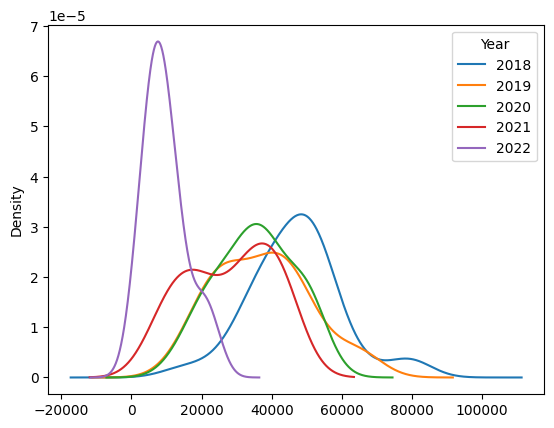

In [160]:
pvt["Miles"].plot(kind='kde')

<Axes: ylabel='Density'>

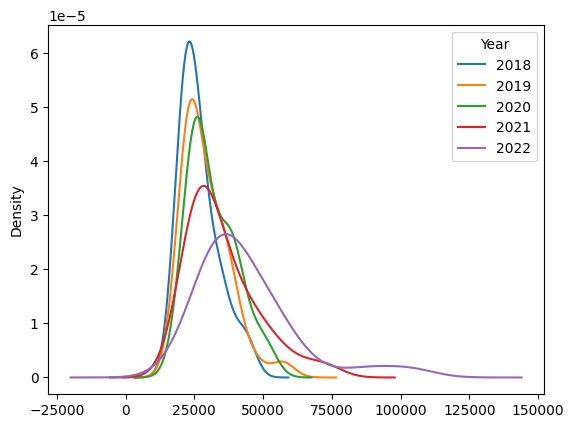

In [161]:
pvt["Price"].plot(kind='kde')

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [127]:
df=pd.read_csv("https://tinyurl.com/2nq6kugt")
df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0


In [128]:
df["perfect power"]=df["Actual(MU)"]-df['Excess(+) / Shortfall (-)']
df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,perfect power
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,13.00
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,28.80
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,40.37
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,13.57
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,38.69


In [129]:
df["Dates"]=pd.to_datetime(df["Dates"])

In [130]:
df["month_day"]=df["Dates"].dt.day

In [131]:
df["Power Station"].value_counts().head(10)

Power Station
NTPC Ltd.    9570
NHPC         5742
NPCIL        5742
GMR ENERG    5742
APL          3828
JPPVL        3828
IBPIL        3828
TATA PCL     3828
JSWEL        3828
NLC          3828
Name: count, dtype: int64

In [135]:
df["month"]=df["Dates"].dt.month_name()
pvt=df.pivot_table(index="Power Station",columns="month")
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

pvt = pvt[[month for month in month_order if month in pvt.columns]]
pvt

Actual(MU)                                              \
month              April     August   December   February    January   
Power Station                                                          
0                    NaN        NaN        NaN        NaN        NaN   
ABAN POWR       0.600000   0.780645   0.858757   0.843972   0.870968   
ACB             4.225000   3.812903   4.265537   4.397163   3.754839   
ACPL            0.000000   0.000000   0.000000   0.000000   0.000000   
ADHPL           0.608333   3.761290   0.000000   0.000000   0.000000   
...                  ...        ...        ...        ...        ...   
VESPL           0.000000   0.000000   0.000000   0.000000   0.000000   
VIP             1.466667   1.006452   3.451977   1.191489   2.561290   
VVL             0.000000   0.000000   0.000000   0.000000   0.000000   
WPCL           35.133333  31.354839  27.271186  26.808511  26.787097   
West Bengal    90.808333  73.116129  78.322034  82.971631  79.883871   

                                                                      \
month               July       June      March        May   November   
Power Station                                                          
0                    NaN        NaN        NaN        NaN        NaN   
ABAN POWR       1.058442   0.886667   1.130841   0.798387   0.821229   
ACB             4.175325   4.600000   4.654206   4.290323   4.480447   
ACPL            0.000000   0.000000   0.000000   0.000000   0.000000   
ADHPL           4.194805   2.633333   0.051402   1.298387   0.011173   
...                  ...        ...        ...        ...        ...   
VESPL           0.000000   0.000000   0.000000   0.000000   0.000000   
VIP             1.389610   1.353333   1.485981   1.491935   3.083799   
VVL             0.000000   0.000000   0.000000   0.000000   0.000000   
WPCL           29.779221  25.866667  28.355140  33.072581  25.318436   
West Bengal    79.675325  82.673333  84.457944  84.120968  74.983240   

                                                  Dates                      \
month            October  September               April              August   
Power Station                                                                 
0              14.925000        NaN                 NaT                 NaT   
ABAN POWR       0.945455   0.783333 2020-04-14 23:24:00 2020-08-15 14:24:00   
ACB             4.006061   3.450000 2020-04-14 23:24:00 2020-08-15 14:24:00   
ACPL            0.000000   0.000000 2020-04-14 23:24:00 2020-08-15 14:24:00   
ADHPL           0.945455   2.100000 2020-04-14 23:24:00 2020-08-15 14:24:00   
...                  ...        ...                 ...                 ...   
VESPL           0.000000   0.000000 2020-04-14 23:24:00 2020-08-15 14:24:00   
VIP             3.163636   3.261111 2020-04-14 23:24:00 2020-08-15 14:24:00   
VVL             0.000000   0.000000 2020-04-14 23:24:00 2020-08-15 14:24:00   
WPCL           28.539394  24.116667 2020-04-14 23:24:00 2020-08-15 14:24:00   
West Bengal    79.259459  76.400000 2020-04-14 23:24:00 2020-08-15 14:24:00   

                                                                            \
month                              December   February             January   
Power Station                                                                
0                                       NaT        NaT                 NaT   
ABAN POWR     2020-04-30 00:24:24.406779648 2020-02-15 2020-01-16 09:36:00   
ACB           2020-04-30 00:24:24.406779648 2020-02-15 2020-01-16 09:36:00   
ACPL          2020-10-30 21:32:03.287671296 2020-02-15 2020-06-18 21:22:30   
ADHPL         2020-04-30 00:24:24.406779648 2020-02-15 2020-01-16 09:36:00   
...                                     ...        ...                 ...   
VESPL         2020-04-30 00:24:24.406779648 2020-02-15 2020-01-16 09:36:00   
VIP           2020-04-30 00:24:24.406779648 2020-02-15 2020-01-16 09:36:00   
VVL           2020-04-30 00:24:

<Axes: xlabel='Power Station'>

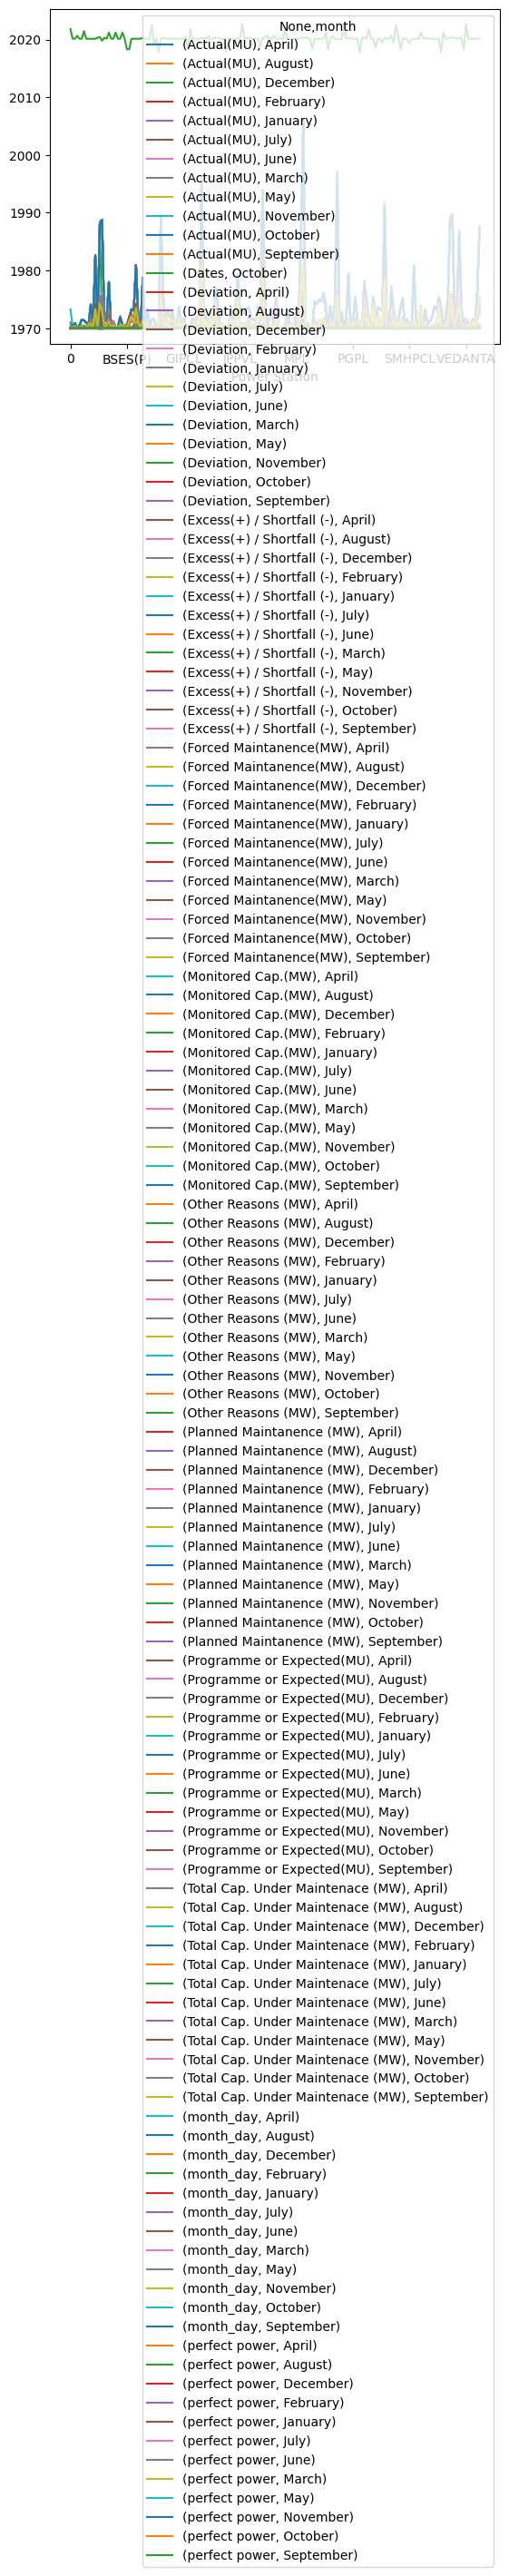

In [48]:
df["month"]=df["Dates"].dt.month_name()
df.pivot_table(index="Power Station",columns="month").fillna(0).plot()

###`Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [82]:
df=pd.read_csv("question-answer.csv")
df.head()

,Unnamed: 0,2
0,0,Q1-What is Data Science?
1,1,"Ans1-Data Science combines statistics, maths, ..."
2,2,Q2-2. How is logistic regression done?
3,3,Ans2-Logistic regression measures the relation...
4,4,Q3-How do you build a random forest model?


In [86]:
new_df=pd.DataFrame()
new_df["Questions"]=df[df.iloc[:,1].str.startswith("Q")].iloc[:,1].reset_index(drop=True)
new_df["Answers"]=df[df.iloc[:,1].str.startswith("A")].iloc[:,1].reset_index(drop=True)

In [87]:
new_df.head()

,Questions,Answers
0,Q1-What is Data Science?,"Ans1-Data Science combines statistics, maths, ..."
1,Q2-2. How is logistic regression done?,Ans2-Logistic regression measures the relation...
2,Q3-How do you build a random forest model?,Ans3-A random forest is built up of a number o...
3,Q4-How can you avoid overfitting your model?,Ans4-Overfitting refers to a model that is onl...
4,Q5-You are given a data set consisting of vari...,Ans5-The following are ways to handle missing ...


In [55]:
df.head()

,Unnamed: 0,2,Questions,Answers
0,0,Q1-What is Data Science?,True,False
1,1,"Ans1-Data Science combines statistics, maths, ...",False,True
2,2,Q2-2. How is logistic regression done?,True,False
3,3,Ans2-Logistic regression measures the relation...,False,True
4,4,Q3-How do you build a random forest model?,True,False


###`Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [ ]:
# code here

###`Q 6-10` LOG and EMPLOYEE
6. Show `activity` details month wise. Show count for each `activity`
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
10. Week Days wise activity table.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [50]:
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

In [51]:
log_file.head()

,Log_ID,dt,dept,emp_id,activity,eqpt
0,1000,2022-01-07,Dept6,115,Cleaning,UPS
1,1001,2022-01-08,Dept4,105,Cleaning,Generator
2,1002,2022-01-09,Dept3,112,Inspection,CPU
3,1003,2022-01-10,Dept4,120,Inspection,UPS
4,1004,2022-01-11,Dept3,138,Checking,Battery


In [52]:
log_file["dt"]=pd.to_datetime(log_file["dt"])
log_file["month"]=log_file["dt"].dt.month_name()

In [53]:
log_file.pivot_table(index="month",columns="activity",aggfunc="count")["Log_ID"]

activity,Checking,Cleaning,Inspection,Repair
month,,,,
April,5,11,9,5
August,8,10,9,4
December,6,7,12,6
February,7,7,4,10
January,7,10,9,5
July,6,6,14,5
June,5,7,8,10
March,8,6,5,12
May,5,8,7,11


In [76]:
tb=log_file.pivot_table(index="emp_id",columns="month",aggfunc="count")['Log_ID']
employee[employee["EMPLOYEE_ID"]==tb[tb["January"]==tb["January"].max()].index[0]]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
22,122,Payam,Kaufling,PKAUFLING


In [90]:
a=[]
for i in log_file["dt"]:
    a+=[1] if i.weekday()>5 else [0]
log_file["work on weekend"]=a

In [115]:
pvt=log_file.pivot_table(index="emp_id",columns="work on weekend",aggfunc="count")["Log_ID"]
employee[employee["EMPLOYEE_ID"].isin(pvt[pvt[1]==pvt[1].max()].index.to_list())]

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
9,109,Daniel,Faviet,DFAVIET
20,120,Matthew,Weiss,MWEISS
38,138,Stephen,Stiles,SSTILES


In [112]:
pvt[pvt[1]==pvt[1].max()].index.to_list()

[109, 120, 138]

In [119]:
a=[]
for i in log_file["dt"]:
    a+=[1] if i.weekday()<5 else [0]
log_file["weekday"]=a

In [124]:
pvt=log_file.pivot_table(index="activity",columns="weekday",aggfunc="count")["Log_ID"]
pvt[pvt[1]==pvt[1].max()].index[0]

'Inspection'

In [125]:
a=[]
for i in log_file["dt"]:
    a+=[i.weekday()]
log_file["weekday"]=a
log_file.pivot_table(index="activity",columns="weekday",aggfunc="count")["Log_ID"]


weekday,0,1,2,3,4,5,6
activity,,,,,,,
Checking,10,15,14,8,8,18,13
Cleaning,14,9,9,16,16,11,13
Inspection,13,15,13,16,20,8,15
Repair,15,13,16,12,9,15,11


In [91]:
employee.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST


### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`

3. Show Full Name of all the employees whose name starts with 'A' and has done any of these activity ['Incpection', 'Cleaning', 'Checking]

In [47]:
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")
employee

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST
5,105,David,Austin,DAUSTIN
6,106,Valli,Pataballa,VPATABAL
7,107,Diana,Lorentz,DLORENTZ
8,108,Nancy,Greenberg,NGREENBE
9,109,Daniel,Faviet,DFAVIET


In [48]:
a=[]
for i in range(len(employee)):
    if type(employee.loc[i,"FIRST_NAME"])==float:
        employee.loc[i,"FIRST_NAME"]=employee.loc[i,"EMAIL"].replace(employee.loc[i,"LAST_NAME"].upper(),"")

In [49]:
employee

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST
5,105,David,Austin,DAUSTIN
6,106,Valli,Pataballa,VPATABAL
7,107,Diana,Lorentz,DLORENTZ
8,108,Nancy,Greenberg,NGREENBE
9,109,Daniel,Faviet,DFAVIET
